This module is dedicated to estimation of number of unique elements is a very big data

In [1]:
import math
from statistics import harmonic_mean
from numpy import random as nprandom
import numpy as np
import hashlib
import timeit

In [2]:
class HashTable:
    def __init__(self):
        self.size = 1000
        self.hash_table = [[] for _ in range(1000)]
        self.cardinality = 0
    def set_val(self, val):
        hashed_key = hash(val) % self.size
        bucket = self.hash_table[hashed_key]
        found_key = False
        for index, record in enumerate(bucket):
            if record == val:
                found_key=True
        if not found_key:
            self.hash_table[hashed_key].append(val)
            self.cardinality+=1

In [3]:
def trivial_counting(nums: list):
    hashmap=HashTable()
    for el in nums:
        hashmap.set_val(el)
    return hashmap.cardinality

In [4]:
def flaj_mart_algo(nums: list):
    max_num=0
    for el in nums:
        binary_form = int(hashlib.sha256(str(el).encode('ASCII')).hexdigest(), 16)
        i=0
        while True:
            if binary_form>>i & 1:
                break
            else:
                i+=1
        if i>max_num:
            max_num=i
    return int(pow(2, max_num)/0.77351)

In [5]:
def loglog(nums:list, m):
    longest_in_bikets = [0]*m
    for el in nums:
        binary_form = int(hashlib.sha256(str(el).encode('ASCII')).hexdigest(), 16)
        num_of_buck = int(bin(binary_form)[3:int(math.log(m, 2))+3], 2)
        trailing_zeros=0
        i=0
        while True:
            if binary_form>>i & 1:
                break
            else:
                i+=1
        if i>longest_in_bikets[num_of_buck]:
            longest_in_bikets[num_of_buck]=i
    return int(m*pow(2, sum(longest_in_bikets)/m)/0.77351)

In [6]:
def super_loglog(nums: list, m):
    longest_in_bikets = [0]*m
    for el in nums:
        binary_form = int(hashlib.sha256(str(el).encode('ASCII')).hexdigest(), 16)
        num_of_buck = int(bin(binary_form)[3:int(math.log(m, 2))+3], 2)
        trailing_zeros=0
        i=0
        while True:
            if binary_form>>i & 1:
                break
            else:
                i+=1
        if i>longest_in_bikets[num_of_buck]:
            longest_in_bikets[num_of_buck]=i
    first_70_perc = sorted(longest_in_bikets)[:int(m*0.7)]
    return int(0.7*m*pow(2, (sum(first_70_perc)/len(first_70_perc)))/0.5)

In [7]:
def hyper_loglog(nums: list, m):
    longest_in_bikets = [0]*m
    for el in nums:
        binary_form = int(hashlib.sha256(str(el).encode('ASCII')).hexdigest(), 16)
        num_of_buck = int(bin(binary_form)[3:int(math.log(m, 2))+3], 2)
        trailing_zeros=0
        i=0
        while True:
            if binary_form>>i & 1:
                break
            else:
                i+=1
        if i>longest_in_bikets[num_of_buck]:
            longest_in_bikets[num_of_buck]=i
    return int(m*harmonic_mean([pow(2, el) for el in longest_in_bikets])/0.77351)

In [8]:
def sample_poisson(n:int):
    return nprandom.poisson(1000, n)

sample_1k = sample_poisson(1000)
sample_10k = sample_poisson(10000)
sample_100k = sample_poisson(100000)
sample_1m = sample_poisson(1000000)
sample_10m = sample_poisson(10000000)
samples=[sample_1k, sample_10k, sample_100k, sample_1m, sample_10m]

In hashmap counting we get precise result, so the error is 0

In [9]:
#test trivial
from timeit import default_timer

real_values=[]
real_times = []
for i, samp in enumerate(samples):
    t1 = default_timer()
    real_values.append(trivial_counting(samp))
    real_times.append(default_timer()-t1)

FM algorithm has very low precision estimation for small n, but it gets much better for large n, as it is based on probability of random event. The smaller the n, the bigger is the chance that a big outlier in data will lead to recieving a result that is much bigger then actual cardinality.

In [10]:
#test fm

fm_values = []
fm_times = []
for i, samp in enumerate(samples):
    t1 = default_timer()
    fm = flaj_mart_algo(samp)
    fm_times.append(default_timer()-t1)
    fm_values.append(fm)
    print(f"For {1000*10**(i)} real is {real_values[i]} fm is {fm}, relative error is {abs(1-fm/real_values[i])}")
# print(fm_times)
    

For 1000 real is 151 fm is 330, relative error is 1.185430463576159
For 10000 real is 210 fm is 330, relative error is 0.5714285714285714
For 100000 real is 253 fm is 330, relative error is 0.30434782608695654
For 1000000 real is 287 fm is 330, relative error is 0.14982578397212554
For 10000000 real is 315 fm is 330, relative error is 0.04761904761904767


FM is good for large n, but we still need to lessen the impact of outliers on our result to make it more precise. For this we separete elements into more or less equal groups and then fing average of the longest sequence from all groups. Thus if we have only a few outliers which mess up the result, their impact will be lessend by adequate results from other groups.

In [11]:
#test loglog
loglog_res =[]
ll_times = []
for i, samp in enumerate(samples):
    opt_m = 2**int(math.log((math.log(1000*10**(i), 2)), 2)+1)
    t1 = default_timer()
    ll = loglog(samp, opt_m)
    ll_times.append(default_timer()-t1)
    loglog_res.append(ll)
    print(f"For {1000*10**(i)} real is {real_values[i]} fm is {ll}, relative error is {abs(1-ll/real_values[i])}")

For 1000 real is 151 fm is 151, relative error is 0.0
For 10000 real is 210 fm is 376, relative error is 0.7904761904761906
For 100000 real is 253 fm is 458, relative error is 0.8102766798418972
For 1000000 real is 287 fm is 478, relative error is 0.6655052264808363
For 10000000 real is 315 fm is 521, relative error is 0.6539682539682539


Super loglog improves loglog by mechanically discarding 30% values of longest sequences from buckets, therefore it further lessens the impact of possible big outliers. However, we don't know how many outliers there actually is, so this is only a half-measure.

HyperLogLog deals with otliers by finding harmonic mean. This method is the best because if the outlier is too big, it almost does m=not contribute to the mean.

In [12]:
#test superloglog
superll_res = []
sll_times = []
for i, samp in enumerate(samples):
        opt_m = 2**int(math.log((math.log(1000*10**(i), 2)), 2)+1)
        t1 = default_timer()
        sll = super_loglog(samp, opt_m)
        sll_times.append(default_timer()-t1)
        superll_res.append(sll)
        print(f"For {1000*10**(i)} real is {real_values[i]} fm is {sll}, relative error is {abs(1-sll/real_values[i])}")
# print(sll_times)

For 1000 real is 151 fm is 84, relative error is 0.4437086092715232
For 10000 real is 210 fm is 190, relative error is 0.09523809523809523
For 100000 real is 253 fm is 245, relative error is 0.031620553359683834
For 1000000 real is 287 fm is 253, relative error is 0.11846689895470386
For 10000000 real is 315 fm is 287, relative error is 0.0888888888888889


In [13]:
#test hyperloglog
hyperll_res = []
hll_times =[]
for i, samp in enumerate(samples):
    opt_m = 2**int(math.log((math.log(1000*10**(i), 2)), 2)+1)
    t1 = default_timer()
    hll = hyper_loglog(samp, opt_m)
    hll_times.append(default_timer()-t1)
    hyperll_res.append(hll)
    print(f"For {1000*10**(i)} real is {real_values[i]} fm is {hll}, relative error is {abs(1-hll/real_values[i])}")

For 1000 real is 151 fm is 88, relative error is 0.41721854304635764
For 10000 real is 210 fm is 176, relative error is 0.16190476190476188
For 100000 real is 253 fm is 258, relative error is 0.01976284584980248
For 1000000 real is 287 fm is 262, relative error is 0.08710801393728218
For 10000000 real is 315 fm is 278, relative error is 0.11746031746031749


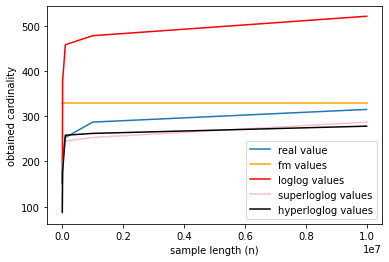

In [17]:
from matplotlib import pyplot as plt

plt.plot([1000, 10000, 100000, 1000000, 10000000], real_values, label = "real value")
plt.plot([1000, 10000, 100000, 1000000, 10000000], fm_values, color="orange", label = "fm values")
plt.plot([1000, 10000, 100000, 1000000, 10000000], loglog_res, color="red", label = "loglog values")
plt.plot([1000, 10000, 100000, 1000000, 10000000], superll_res, color="pink", label = "superloglog values")
plt.plot([1000, 10000, 100000, 1000000, 10000000], hyperll_res, color="black", label = "hyperloglog values")
plt.xlabel("sample length (n)")
plt.ylabel("obtained cardinality")
leg=plt.legend()

Time complexity analisys

For a usual hashmap tme complexity is n*O(n/m) ~ O(n^2/m), where n is number of elements in array and m is a size of the hash table. (We need to insert n elements to hash table of length m therefore time complexity is time complexity of one insertion multiplied by n)

For Flajolet-Martin algorithm  we need to find the maximum number of trailing zeros for every n and then find power of 2. As we need to find power only once, in general time complexity should be O(nq), where q is length of binary hash reprezentation of number

For LogLog algorithm  we need to find the maximum number of trailing zeros for every n, divide numbers to buckets (which depend on first bits of hash representation), and then find power of 2. As we need to find power only once and bits of buckets don`t cross with bits of trailing zeros, in general time complexity should also be O(nq), where q is length of binary hash reprezentation of number


For SuperLogLog and HyperLogLog the logic is the same as for LogLog, as they differ only in the way we find power of 2. Therefore, their time complexities are also O(nq)

In real life, howewer, if hash table is large enough (m is bigger or a couple times smaller then n) it is faster then other methods, because counting powers and finding hash add quite big coefficient to nq time, while n*n/m becomes nc, where c is a small constant.

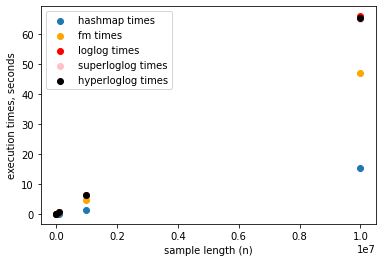

In [15]:
from matplotlib import pyplot as plt

plt.scatter([1000, 10000, 100000, 1000000, 10000000], real_times, label = "hashmap times")
plt.scatter([1000, 10000, 100000, 1000000, 10000000], fm_times, color="orange", label = "fm times")
plt.scatter([1000, 10000, 100000, 1000000, 10000000], ll_times, color="red", label = "loglog times")
plt.scatter([1000, 10000, 100000, 1000000, 10000000], sll_times, color="pink", label = "superloglog times")
plt.scatter([1000, 10000, 100000, 1000000, 10000000], hll_times, color="black", label = "hyperloglog times")
plt.xlabel("sample length (n)")
plt.ylabel("execution times, seconds")
leg=plt.legend()


Space conplexity of hashtable is O(m*(n/m)), where m is length of hash table and m is number of elements. As is trivial counting of unique elements we have to store at least all unique elements first, it can take a lot of space for large ns with little unique elements.

Space complexity of FM algorithm is O(1), as we only need to store the length of the longest sequence of traling zeroes between algorithm iterations.

Space complexity of all LogLog algorithms is O(m), as we only need to store the length of the longest sequence of traling zeroes for every of m buckets.